In [39]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [40]:
df = pd.read_csv('events.csv', error_bad_lines=False)

/home/santiago/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
# solo hay datos de new_vs_returning para el evento 'visited_site'
new_vs_returning2 = df.groupby('event')['new_vs_returning'].count().sort_values(ascending=False)
new_vs_returning2

event
visited site         87378
viewed product           0
staticpage               0
searched products        0
search engine hit        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
ad campaign hit          0
Name: new_vs_returning, dtype: int64

Text(0,0.5,'Usuario')

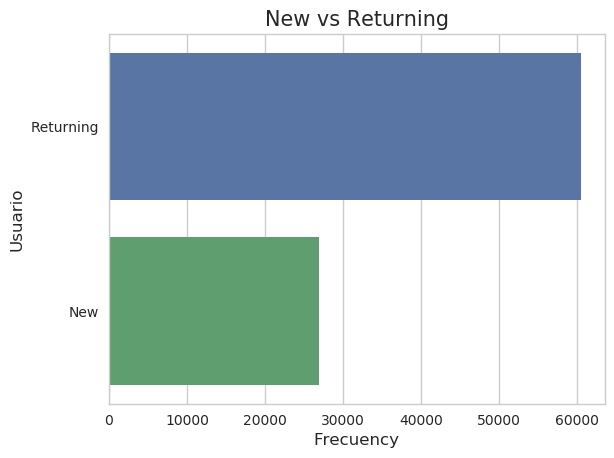

In [55]:
# BarPlot usuarios nuevos vs viejos.
new_vs_returning = df.groupby('new_vs_returning')['event'].count().sort_values(ascending=False)
g = sns.barplot(x=new_vs_returning.values, y=new_vs_returning.index, orient='h')
g.set_title("New vs Returning", fontsize=15)
g.set_xlabel("Frecuency", fontsize=12)
g.set_ylabel("Usuario", fontsize=12)

Text(0,0.5,'Channel')

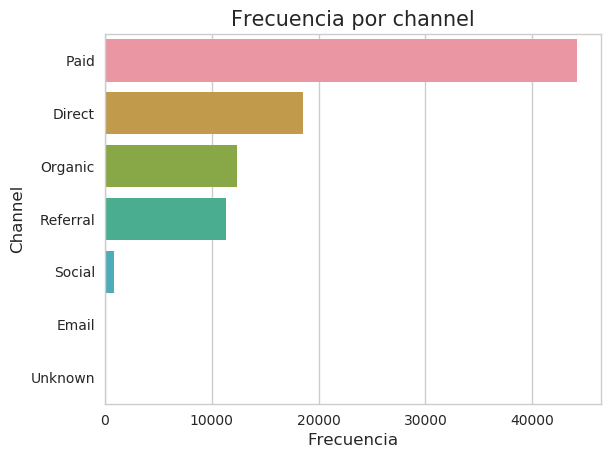

In [60]:
# BarPlot channels
channel = df.groupby('channel')['event'].count().sort_values(ascending=False)
g = sns.barplot(x=channel.values, y=channel.index, orient='h')
g.set_title("Frecuencia por channel", fontsize=15)
g.set_xlabel("Frecuencia", fontsize=12)
g.set_ylabel("Channel", fontsize=12)

In [6]:
df2 = df.loc[df['event'] == 'conversion', :]
df3 = df2.groupby('model')['event'].count().sort_values(ascending=False)
df3.head(10)

model
Samsung Galaxy J5         88
iPhone 5s                 84
iPhone 6                  71
Samsung Galaxy S6 Flat    39
iPhone 6S                 37
iPhone 5c                 33
Motorola Moto G4 Plus     30
Motorola Moto G3 4G       30
Samsung Galaxy J7         28
Samsung Galaxy A5         27
Name: event, dtype: int64

In [68]:
# antes verifique que solo en el evento 'visited site' aparece el sistema operativo
dfEventVisitedSite = df.loc[df['event'] == 'visited site']
dfAndroid = dfEventVisitedSite.loc[df['operating_system_version'].astype(str).str.contains('Android')]
dfGroupedByOS = dfAndroid.groupby('operating_system_version')['event'].count().sort_values(ascending=True)
dfGroupedByOS

operating_system_version
Android 3.2         1
Android 4.0.3       1
Android 6.3         1
Android 4.4         1
Android 3.1         2
Android 4.4.1       4
Android 4.1.1       5
Android 6.1         5
Android 2.3.6       8
Android            16
Android 4.4.3      21
Android 8.1        21
Android 4.0.4      53
Android 7.1.2     141
Android 4.3       318
Android 5         321
Android 4.1.2     519
Android 4.2.2     566
Android 5.0.1     746
Android 8         973
Android 5.1      1269
Android 4.4.4    1288
Android 4.4.2    1402
Android 5.0.2    1640
Android 7.1.1    3325
Android 5.1.1    4123
Android 6        6871
Android 6.0.1    7805
Android 7        9964
Name: event, dtype: int64

In [63]:
dfEventVisitedSite = df.loc[df['event'] == 'visited site']
dfEventVisitedSite.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0
87,2018-05-04 18:47:03,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Direct,Returning,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 66.0
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0
106,2018-06-06 18:40:53,visited site,001bb7eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Organic,New,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52
108,2018-06-08 12:15:33,visited site,001bb7eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,Returning,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52
112,2018-05-29 12:56:08,visited site,001f1653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x570,Android 6,Chrome Mobile 39
